<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_9_Image_Restore_Reconstruct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ICE-9 Image Restoration and Reconstruction

# Use this image : https://en.wikipedia.org/wiki/Lenna#/media/File:Lenna_(test_image).png

### Salt and pepper noise


(Tutorial)
- Salt-and-pepper noise can only be added in a grayscale image. So, convert an image to grayscale after reading it
- Randomly pick the number of pixels to which noise is added (number_of_pixels)
- Randomly pick some pixels in the image to which noise will be added. It can be done by randomly picking x and y coordinate
- Note the random values generated must be within the range of the image dimensions. The x and y coordinates must be within the range of the image size
Random numbers can be generated using random number generator functions like random.randint used in the code
- Color some randomly picked pixels as black setting their value to 0
- Color some randomly picked pixels as white setting their value to 255
Save the value of the image

In [ ]:
!gdown '1P64NhQGO3S7PgPOFMhRlXeuY3oh5sie7'

Downloading...
From: https://drive.google.com/uc?id=1P64NhQGO3S7PgPOFMhRlXeuY3oh5sie7
To: /content/Lenna.png
100% 474k/474k [00:00<00:00, 121MB/s]



 
 Original Image : 
 
 


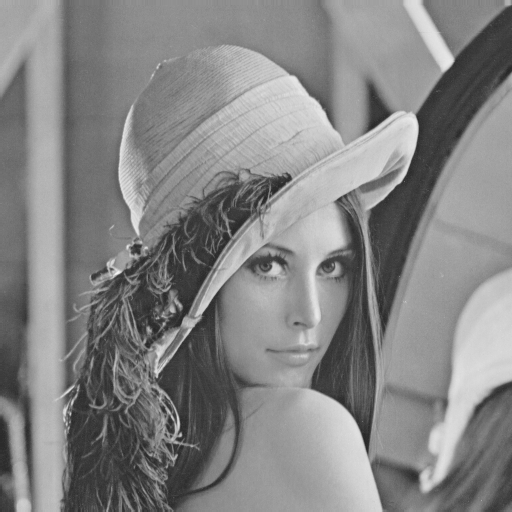


 
 Image with salt and pepper noise : 
 
 


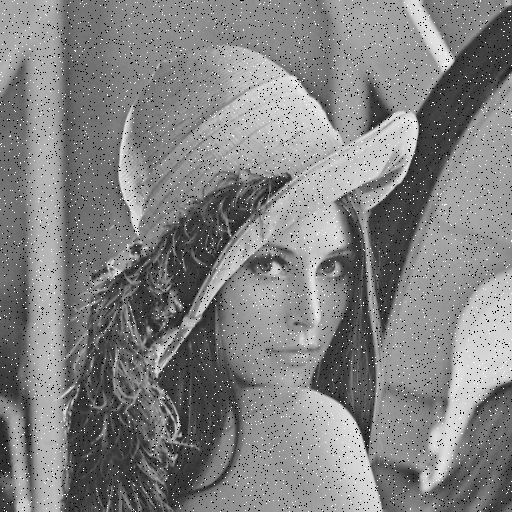

In [ ]:
import random
import cv2

from google.colab.patches import cv2_imshow


def add_noise(img):

    # Getting the dimensions of the image
    row , col = img.shape

    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to white
        img[y_coord][x_coord] = 255

    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):

        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)

        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)

        # Color that pixel to black
        img[y_coord][x_coord] = 0

    return img

# salt-and-pepper noise can
# be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

print ("\n \n Original Image : \n \n ")

cv2_imshow(img)

img2 = add_noise(img)

print ("\n \n Image with salt and pepper noise : \n \n ")

cv2_imshow(img2)

# Question 1
## Explain briefly why is noise found in an image . What are the ways to reduce it ?


### ANSWER HERE

## Task 1

### Use the salt pepper noise image above and reduce noise in it .

- Use Median Filter
- Before starting print the noisy image
- Reduce noise and comment your code appropriately
- Print the image obtained after you apply filter and reducing noise .



In [ ]:
# Code here


 
 Image with salt and pepper noise : 
 
 


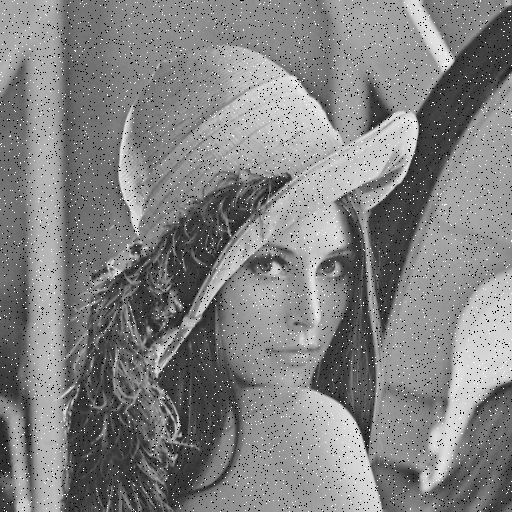

In [ ]:
#Printing noisy image - step 2

print ("\n \n Image with salt and pepper noise : \n \n ")

cv2_imshow(img2)

###using median filter (manually) - replacing all pixels with median filter (steps 1, 3 & 4)

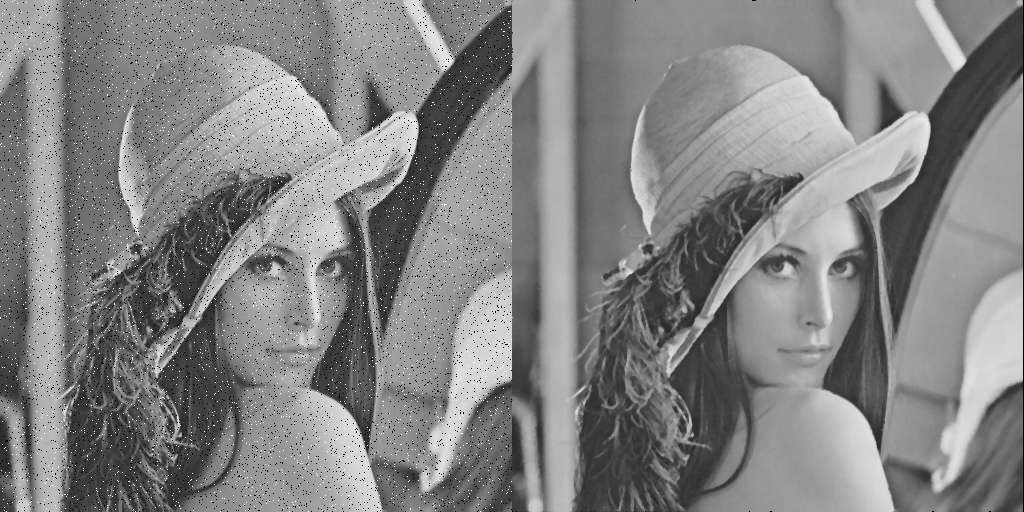

In [ ]:
import numpy as np

#defining median filter
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    #defining zero array with size same as input
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    #scanning pixel by pixel (2 loops)
    for i in range(len(data)):

        for j in range(len(data[0])):
            #checking boundry cases and setting value as 0
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                    #creating median filter for non-boundary cases
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            #replacing with median value
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final



#arr = np.array(img2)
removed_noise = median_filter(img2, 3)
#cv2_imshow(removed_noise)
compare = np.concatenate((img2, removed_noise), axis=1) #side by side comparison
cv2_imshow(compare)


###using median filter (manually) - replacing only pixels where value is 0 or 255 with median filter

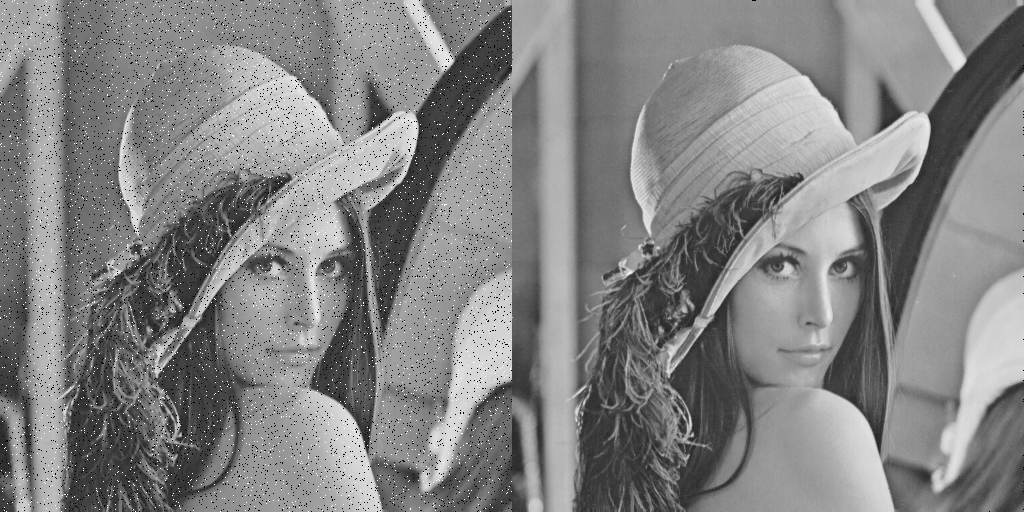

In [ ]:
#defining median filter
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    #defining zero array with size same as input
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    #scanning pixel by pixel (2 loops)
    for i in range(len(data)):

        for j in range(len(data[0])):
            #checking boundry cases and setting value as 0
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                    #creating median filter for non-boundary cases
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            #replacing with median value only that pixel has value as 0 or 255 (might be added as salt and pepper noise)
            if data[i][j] == 0 or data[i][j] == 255:
              data_final[i][j] = temp[len(temp) // 2]
            else:
              data_final[i][j] = data[i][j]
            temp = []
    return data_final



#arr = np.array(img2)
removed_noise = median_filter(img2, 3)
#cv2_imshow(removed_noise)
compare = np.concatenate((img2, removed_noise), axis=1) #side by side comparison
cv2_imshow(compare)


reference:

https://github.com/MeteHanC/Python-Median-Filter/blob/master/MedianFilter.py

###using opencv medianBlur function

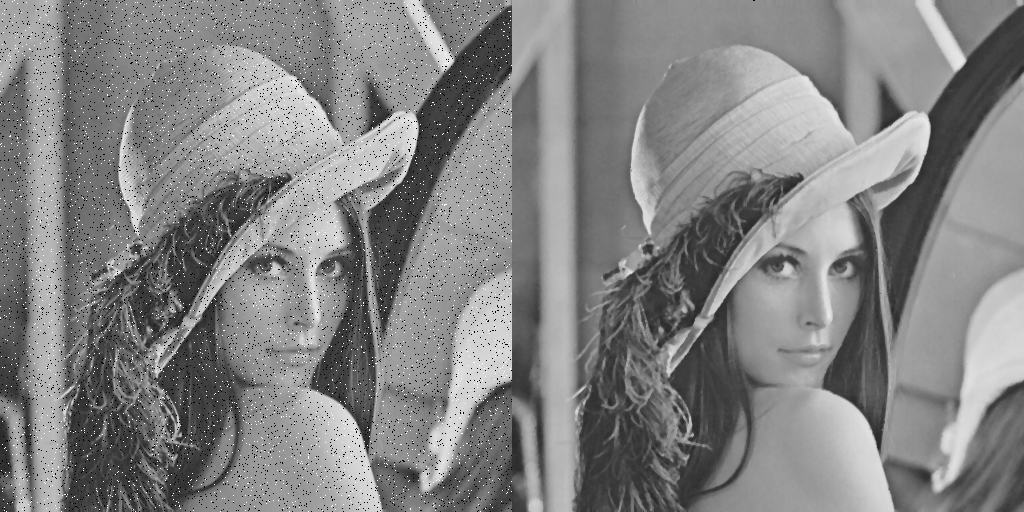

In [ ]:
#reducing noise with median_blur and printing image
import cv2
import numpy as np


#cv2.medianBlur(input_image, kernel_size)
median_blur= cv2.medianBlur(img2, 3)

compare = np.concatenate((img2, median_blur), axis=1) #side by side comparison

cv2_imshow(compare)


# Question 2   

## In task 1 why is Median filter chosen . What is the use of median filter here ?

### ANSWER HERE

## Task 2.

### Use the image  given above (lenna png) and add Poisson Noise in it

**Hint : Use OpenCV-Python**


In [ ]:
# code here

###Poisson Noise

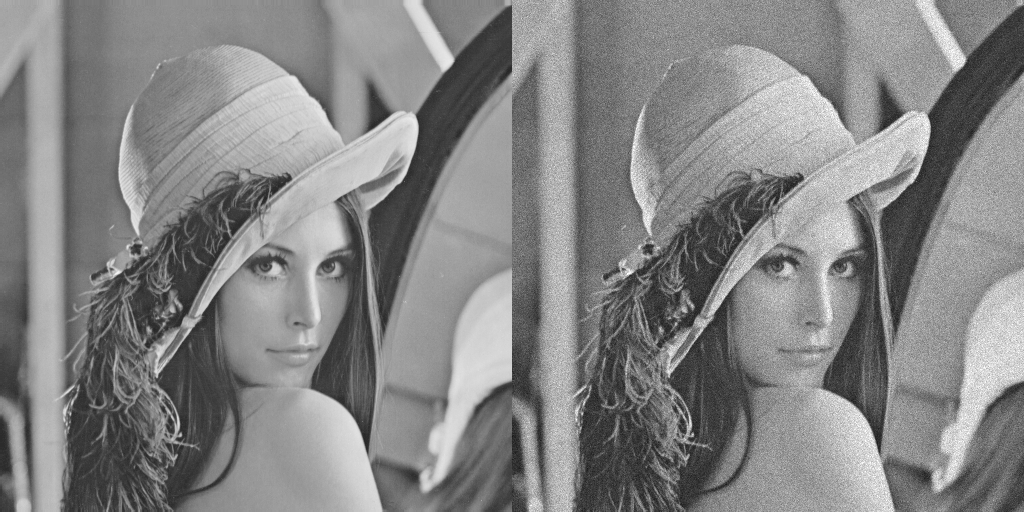

In [ ]:
import numpy as np
import cv2

# Load image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Add Poisson noise
noise = np.random.poisson(img)
noisy_img = np.clip(noise, 0, 255).astype(np.uint8)

# Show original and noisy images
poiss_compare = np.concatenate((img, noisy_img), axis=1) #side by side comparison
cv2_imshow(poiss_compare)

##Testing purpose only

###Gaussian Noise

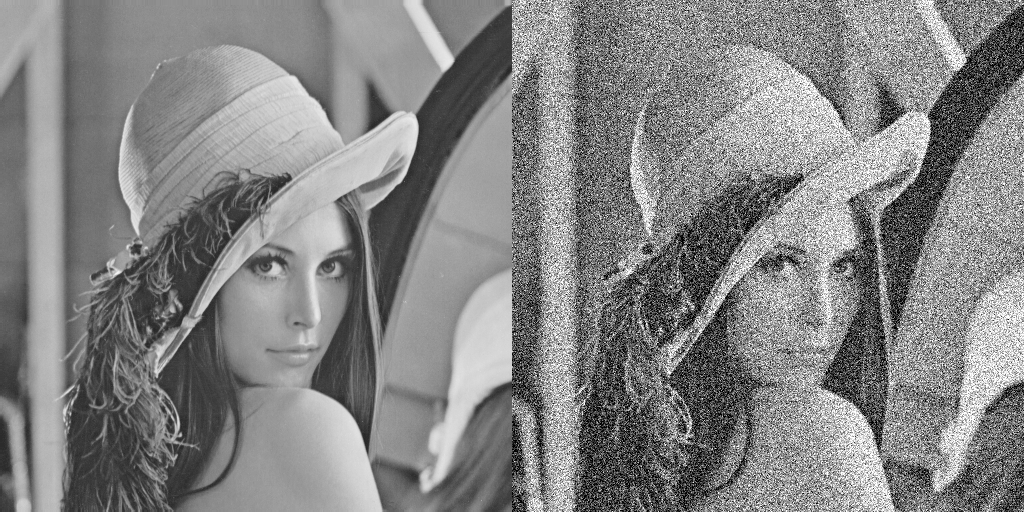

In [ ]:
import numpy as np
import cv2

# Load image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Add Gaussian noise
noise = np.random.normal(loc=0, scale=50, size=img.shape)
noisy_img = img + noise

# Show original and noisy images
gaus_compare = np.concatenate((img, noisy_img), axis=1) #side by side comparison
cv2_imshow(gaus_compare)

###Testing Gaussian noise on original image (Color Channel)


 
 Generated noise : 
 
 


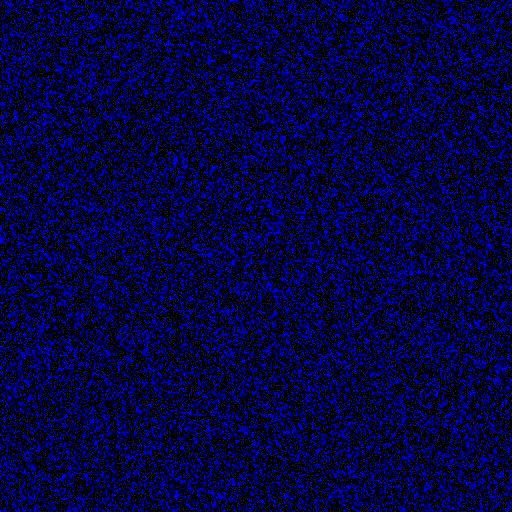


 
 Original and with noise : 
 
 


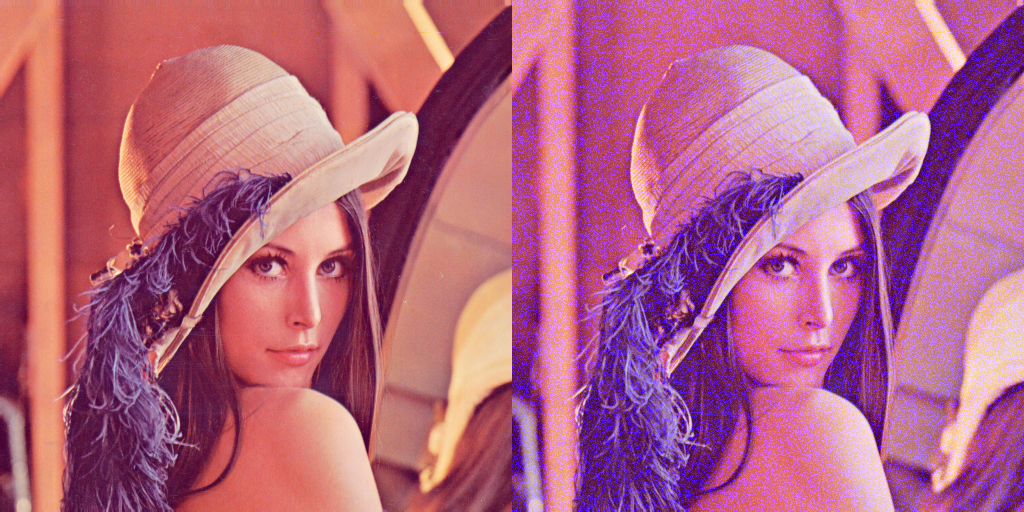

In [ ]:
img = cv2.imread('Lenna.png')

# Generate random Gaussian noise
mean = 0
stddev = 180
noise = np.zeros(img.shape, np.uint8)
cv2.randn(noise, mean, stddev)

print ("\n \n Generated noise : \n \n ")
cv2_imshow(noise)

# Add noise to image
noisy_img = cv2.add(img, noise)

compare = np.concatenate((img, noisy_img), axis=1) #side by side comparison

print ("\n \n Original and with noise : \n \n ")
cv2_imshow(compare)


###Testing Poisson noise on original image (Color Channel)

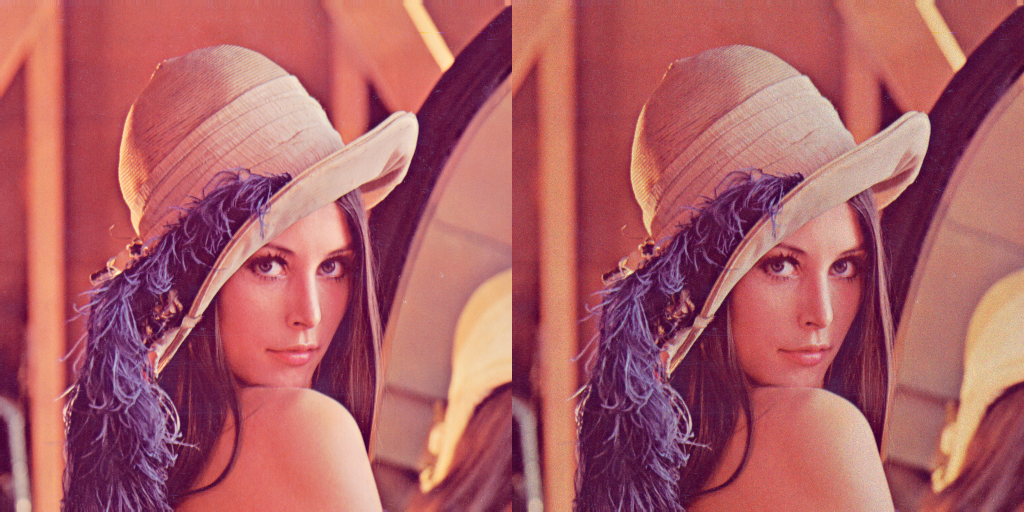

In [ ]:
noise = np.random.poisson(img)
noise_img = img + noise
noise_img = 255 * (noise_img / np.amax(noise_img))

compare = np.concatenate((img, noise_img), axis=1) #side by side comparison
cv2_imshow(compare)

References:


https://www.codingdeeply.com/how-to-add-noise-to-your-dataset-in-python/


https://github.com/joeylitalien/noise2noise-pytorch/blob/790704a79f9a3620200260cd50ad2968f74522d3/src/datasets.py#L123-L130


https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html

https://tomroelandts.com/articles/gaussian-noise-is-added-poisson-noise-is-applied

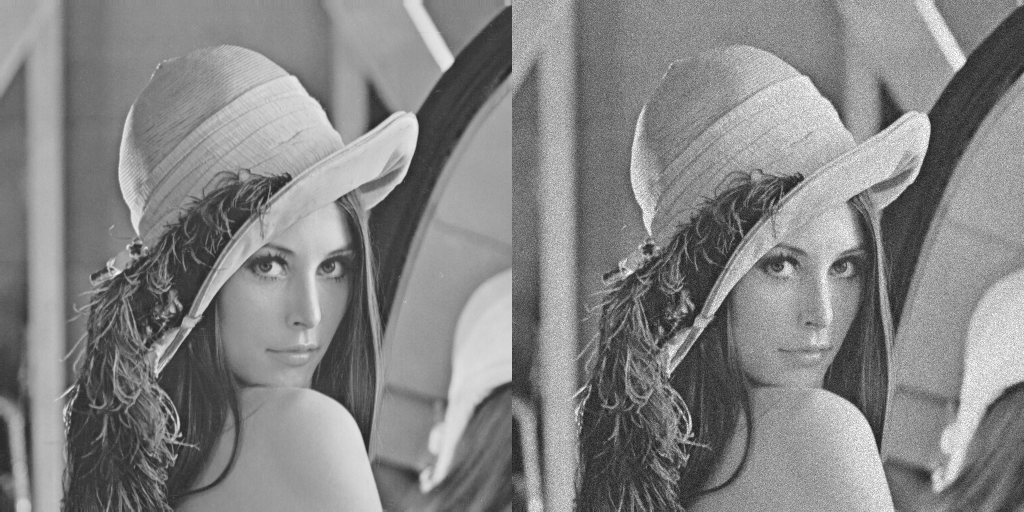

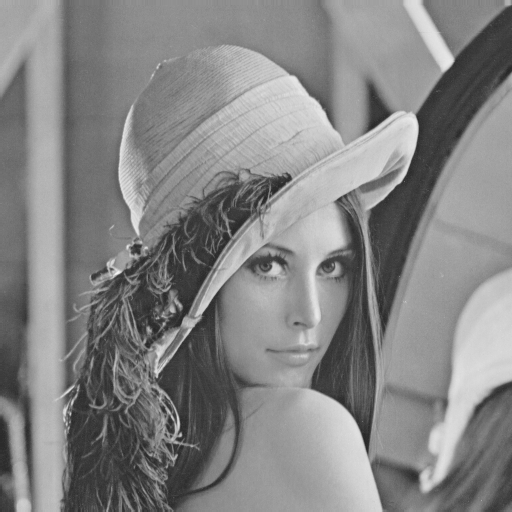

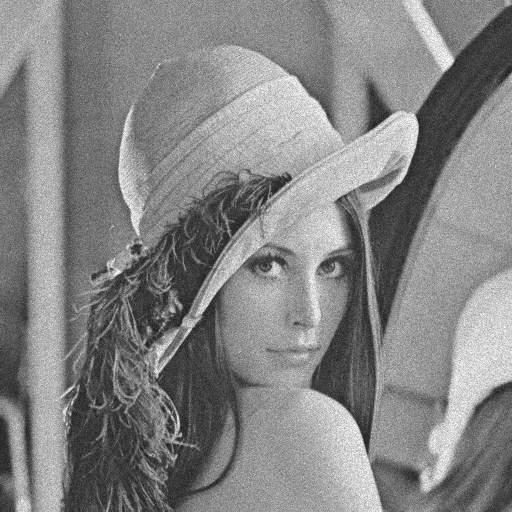

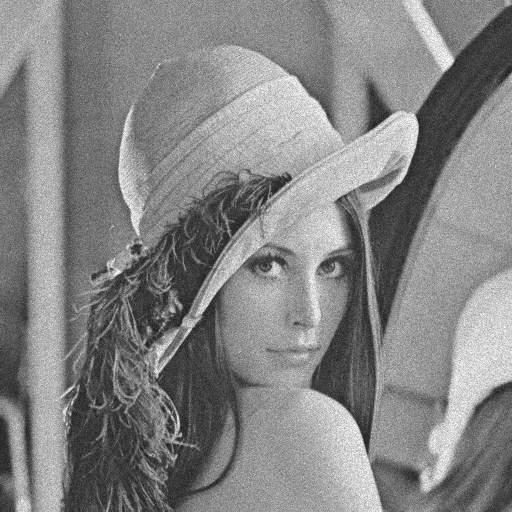

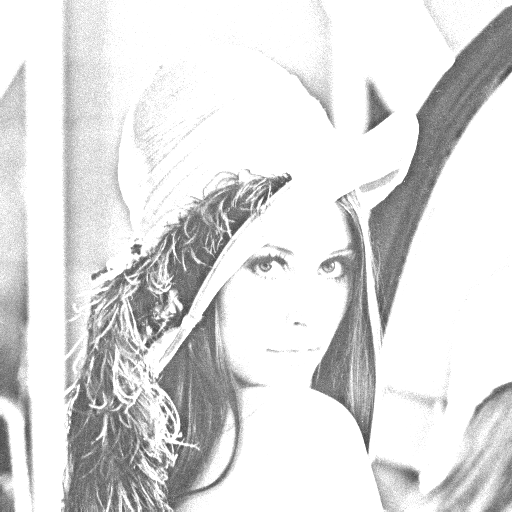

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load image
img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE)

# Add Poisson noise
noise = np.random.poisson(img)
noisy_img = np.clip(noise, 0, 255).astype(np.uint8)

# Show original and noisy images
poiss_compare = np.concatenate((img, noisy_img), axis=1) #side by side comparison
cv2_imshow(poiss_compare)


noisy_img2 = np.clip(img + noise, 0, 255).astype(np.uint8)

cv2_imshow(img)
cv2_imshow(noise)
cv2_imshow(noisy_img)
cv2_imshow(noisy_img2)